In [ ]:
'''
Course Name - Pattern Recognition Lab
Course No. - CSE 4214
Experiment Name - Designing a Minimum Distance to Class Mean Classifier 
Name - Simon Das
Section - C2
Student ID - 16.01.04.146
'''

'\nCourse Name - Pattern Recognition Lab\nCourse No. - CSE 4214\nExperiment Name - Designing a Minimum Distance to Class Mean Classifier \nName - Simon Das\nSection - C2\nStudent ID - 16.01.04.146\n'

In [ ]:
from google.colab import files

uploaded_train = files.upload()

Saving train.txt to train.txt


In [ ]:
import io
import pandas as pd

# reading the training samples
training_data = pd.read_csv(io.BytesIO(uploaded_train['train.txt']), sep=' ', header=None)

In [ ]:
training_data.describe()

,0,1,2
count,12.000000,12.000000,12.000000
mean,0.000000,1.250000,1.500000
std,2.763397,2.454125,0.522233
min,-4.000000,-3.000000,1.000000
25%,-2.000000,-0.250000,1.000000
50%,-0.500000,2.000000,1.500000
75%,2.250000,2.250000,2.000000
max,4.000000,6.000000,2.000000


In [ ]:
training_data.columns = ['value1', 'value2', 'target']

# separating the training samples into two classes
training_x_y = training_data.groupby('target')
training_x_y_dict = {}
for t, v in training_x_y:
  training_x_y_dict[t] = v

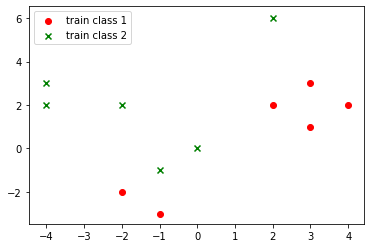

In [ ]:
import matplotlib.pyplot as plt

# plotting the training samples of two classes in a graph with different color and marker
# red color and marker 'o' for class 1 and green color and marker 'x' for class 2
plt.scatter(training_x_y_dict[1]['value1'], training_x_y_dict[1]['value2'], c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(training_x_y_dict[2]['value1'], training_x_y_dict[2]['value2'], c = 'g', marker = 'x', label = 'train class 2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
import numpy as np

# calculating the mean
y1 = np.mat([[training_x_y_dict[1]['value1'].mean(), training_x_y_dict[1]['value2'].mean()]]) 
y2 = np.mat([[training_x_y_dict[2]['value1'].mean(), training_x_y_dict[2]['value2'].mean()]])

In [ ]:
uploaded_test = files.upload()

Saving test.txt to test.txt


In [ ]:
# reading the test samples
testing_data = pd.read_csv(io.BytesIO(uploaded_test['test.txt']), sep=' ', header=None)
testing_data.columns = ['value1', 'value2', 'target']

In [ ]:
# converting features of test data into matrix
testing_x_mat_arr = (testing_data.drop('target', axis=1)).to_numpy()
testing_x_mat = np.asmatrix(testing_x_mat_arr)

# array for storing the class 1 and class 2 testing data according to minimum distance classifier
testing_x_calss1 = np.empty(( 0, 2))
testing_x_calss2 = np.empty(( 0, 2))

# list for storing the predictions
measure_accuracy = []

In [ ]:
# minimum distance classifier with respect to class 'mean'
for i in range(len(testing_x_mat)):
  g1 = (y1 * testing_x_mat[i].transpose()) - (0.5 * (y1 * y1.transpose()))
  g2 = (y2 * testing_x_mat[i].transpose()) - (0.5 * (y2 * y2.transpose()))
  if g1 > g2:
    testing_x_calss1 = np.append(testing_x_calss1, [[testing_x_mat[i].item(0), testing_x_mat[i].item(1)]], axis=0)
    measure_accuracy.append(1)
  else:
    testing_x_calss2 = np.append(testing_x_calss2, [[testing_x_mat[i].item(0), testing_x_mat[i].item(1)]], axis=0)
    measure_accuracy.append(2)

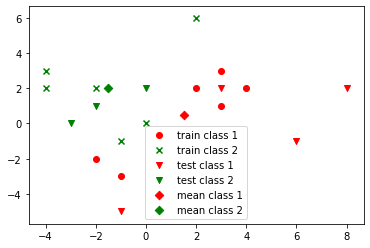

In [ ]:
# plotting the training samples
plt.scatter(training_x_y_dict[1]['value1'], training_x_y_dict[1]['value2'], c = 'r', marker = "o", label = 'train class 1')
plt.scatter(training_x_y_dict[2]['value1'], training_x_y_dict[2]['value2'], c = 'g', marker = "x", label = 'train class 2')
# plotting the testing samples
plt.scatter(testing_x_calss1[:, 0], testing_x_calss1[:, 1], c = 'r', marker = "v", label = 'test class 1')
plt.scatter(testing_x_calss2[:, 0], testing_x_calss2[:, 1], c = 'g', marker = "v", label = 'test class 2')
# plotting the means
plt.scatter(y1.item(0), y1.item(1), c = 'r', marker = "D", label = 'mean class 1')
plt.scatter(y2.item(0), y2.item(1), c = 'g', marker = "D", label = 'mean class 2')

plt.legend(loc = 'best')

plt.show()

In [ ]:
# decision boundary(g1 = g2)
x_db = []
y_db = []
for i in range(training_data['value1'].min(), training_data['value1'].max()+1):
  x_db.append(i)
  j = ((3 * i) + 1.875) / 1.5 # this is calculated from g1 = g2
  y_db.append(j)

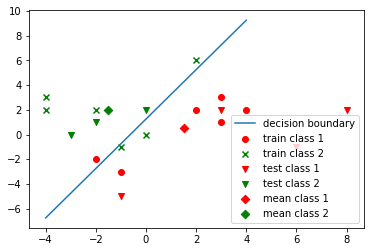

In [ ]:
# plotting the training samples
plt.scatter(training_x_y_dict[1]['value1'], training_x_y_dict[1]['value2'], c = 'r', marker = "o", label = 'train class 1')
plt.scatter(training_x_y_dict[2]['value1'], training_x_y_dict[2]['value2'], c = 'g', marker = "x", label = 'train class 2')
# plotting the testing samples
plt.scatter(testing_x_calss1[:, 0], testing_x_calss1[:, 1], c = 'r', marker = "v", label = 'test class 1')
plt.scatter(testing_x_calss2[:, 0], testing_x_calss2[:, 1], c = 'g', marker = "v", label = 'test class 2')
# plotting the means
plt.scatter(y1.item(0), y1.item(1), c = 'r', marker = "D", label = 'mean class 1')
plt.scatter(y2.item(0), y2.item(1), c = 'g', marker = "D", label = 'mean class 2')
# plotting decision boundary
plt.plot( x_db, y_db, label = 'decision boundary')

plt.legend(loc = 'best')

plt.show()

In [ ]:
# measuring accuracy
counter = 0
for i in range(len(testing_data['target'])):
  if measure_accuracy[i] == testing_data['target'][i]:
    counter += 1

accuracy = (counter / len(testing_data['target'])) * 100
print(accuracy)

85.71428571428571
